In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

In [2]:
m = np.random.randint(0, 25)
b = np.random.randint(0, 25)
xs = np.arange(0, 10, 0.01)
ys = [(m*x+b)+np.random.normal(scale=5) for x in np.arange(0, 10, 0.01)]

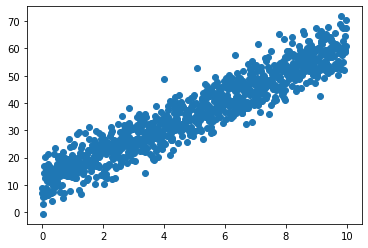

In [3]:
plt.scatter(xs, ys)
plt.show()

In [4]:
def calc_mse(y_hat, y):
    error = 0.5 * (y - y_hat) ** 2
    return error

def calc_avg_err(y_hats, ys):
    """
    Calculates the average error between a list of predictions, y_hats
    and a list of labels, ys.
    """
    error = np.mean([calc_mse(y_hat, y) for y_hat, y in zip(y_hats, ys)])
    return error


In [5]:
calc_avg_err([100,200,300], [1,2,3])

22869.0

In [6]:
pred_m = np.random.normal()
pred_b = np.random.normal()

In [7]:
def predict(pred_m, pred_b, x):
    return pred_m * x + pred_b

def predict_s(pred_m, pred_b, xs):
    return [predict(pred_m, pred_b, x) for x in xs]

In [8]:
y_delta = predict_s(pred_m, pred_b, xs)

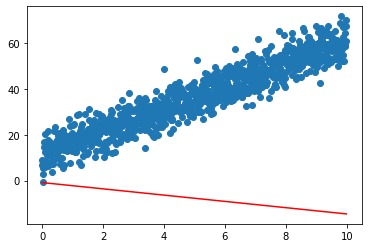

In [9]:
plt.scatter(xs, ys)
plt.plot(xs, y_delta, c='r')
plt.show()

In [10]:
calc_avg_err(y_delta, ys)

1141.4820519282366

In [11]:
def gradient_step(pred_m, pred_b, xs, ys, eta=0.01):
    """
    Performs one gradient descent step using all of the data points
    pred_m (float): predicted m value
    pred_b (float): predicted b value
    xs (list[float]): x values for data points
    ys (list[float]): y values for data points
    eta (float): learning rate
    """
    
    N = len(xs)
    grad_m = 0
    grad_b = 0
    
    for x, y in zip(xs, ys):
        grad_m += - (1/N) * x * (y - (pred_m * x + pred_b)) 
        grad_b += - (1/N) * (y - (pred_m * x + pred_b))
        
    new_m = pred_m - (eta * grad_m)
    new_b = pred_b - (eta * grad_b)
    
    return new_m, new_b

In [12]:
pred_m, pred_b = gradient_step(pred_m, pred_b, xs, ys)
y_delta_init = y_delta
y_delta = predict_s(pred_m, pred_b, xs)
calc_avg_err(y_delta, ys)

511.83320752069864

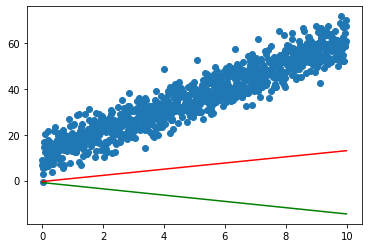

In [13]:
plt.scatter(xs, ys)
plt.plot(xs, y_delta_init, c='g')
plt.plot(xs, y_delta, c='r')
plt.show()

In [14]:
errors = []
for _ in range(1000):
    pred_m, pred_b = gradient_step(pred_m, pred_b, xs, ys)
    y_hats = predict_s(pred_m, pred_b, xs)
    error = calc_avg_err(y_hats, ys)
    errors.append(error)

In [15]:
y_hats = predict_s(pred_m, pred_b, xs)

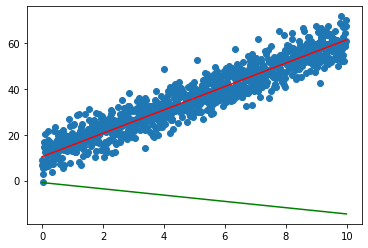

In [16]:
plt.scatter(xs, ys)
plt.plot(xs, y_delta_init, c='g')
plt.plot(xs, y_hats, c='r')
plt.show()

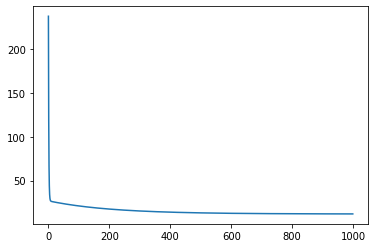

In [17]:
plt.plot(errors)
plt.show()